In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics

In [3]:
# loading the csv data
df = pd.read_csv("vg.csv")

In [4]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [5]:
# Renaming Columns
df = df.rename(columns={'total_sales': 'sales', 'critic_score': 'rating'})

In [6]:
df.head()

,img,title,console,genre,publisher,developer,rating,sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [7]:
# Drop multiple columns
df = df.drop(['img', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'release_date', 'last_update'], axis=1)
print(df)

                                  title console         genre  \
0                    Grand Theft Auto V     PS3        Action   
1                    Grand Theft Auto V     PS4        Action   
2           Grand Theft Auto: Vice City     PS2        Action   
3                    Grand Theft Auto V    X360        Action   
4             Call of Duty: Black Ops 3     PS4       Shooter   
...                                 ...     ...           ...   
64011             XBlaze Lost: Memories      PC  Visual Novel   
64012                      Yoru, Tomosu     PS4  Visual Novel   
64013                      Yoru, Tomosu      NS  Visual Novel   
64014   Yunohana SpRING! ~Mellow Times~      NS  Visual Novel   
64015  Yurukill: The Calumniation Games     PS4  Visual Novel   

                  publisher             developer  rating  sales  
0            Rockstar Games        Rockstar North     9.4  20.32  
1            Rockstar Games        Rockstar North     9.7  19.39  
2            Rocks

In [8]:
df.isnull().sum() # Check the number of missing values for each column

title            0
console          0
genre            0
publisher        0
developer       17
rating       57338
sales        45094
dtype: int64

In [9]:
# filling the null values
df['developer'].fillna('Unknown', inplace=True)
df.isnull().sum() # Checking the number of missing values for each column

title            0
console          0
genre            0
publisher        0
developer        0
rating       57338
sales        45094
dtype: int64

In [10]:
df['rating'].fillna(df['rating'].mean(), inplace=True)
df.isnull().sum() # Checking the number of missing values for each column

title            0
console          0
genre            0
publisher        0
developer        0
rating           0
sales        45094
dtype: int64

In [11]:
df['sales'].fillna(df['sales'].mean(), inplace=True)
df.isnull().sum() # Checking the number of missing values for each column

title        0
console      0
genre        0
publisher    0
developer    0
rating       0
sales        0
dtype: int64

In [12]:
df.head()

,title,console,genre,publisher,developer,rating,sales
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.40000,20.32
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70000,19.39
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.60000,16.15
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,7.22044,15.86
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10000,15.09


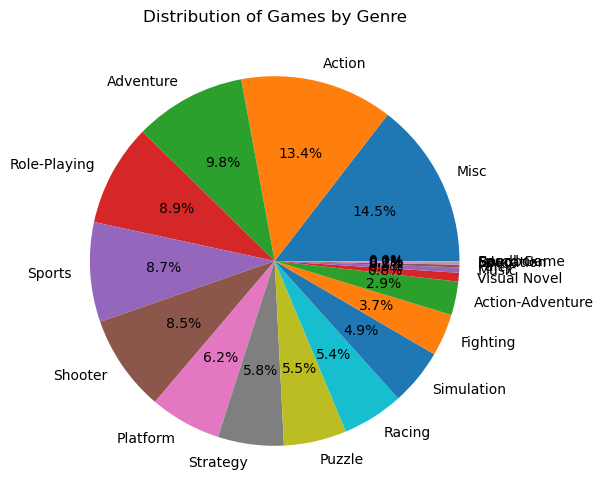

In [13]:
genre_counts = df['genre'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
_ = plt.title('Distribution of Games by Genre')

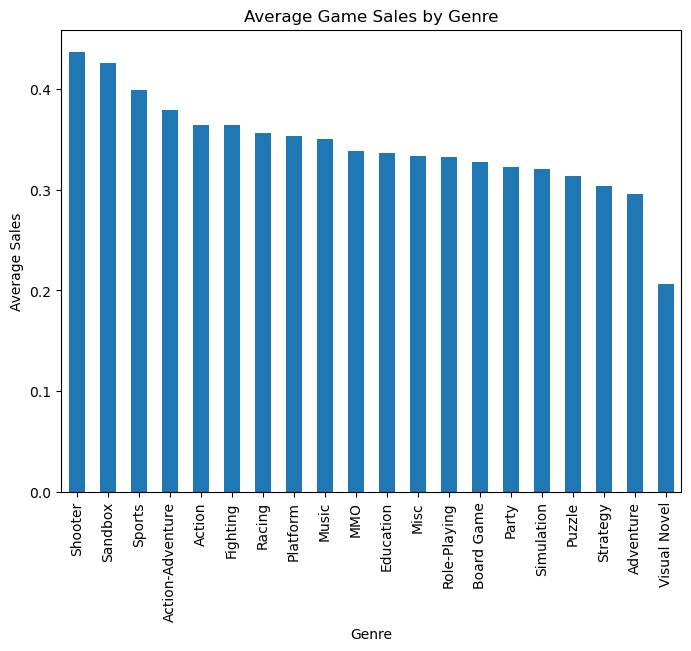

In [14]:
plt.figure(figsize=(8, 6))

avg_sales_by_genre = df.groupby('genre')['sales'].mean().sort_values(ascending=False)
avg_sales_by_genre.plot(kind='bar')

plt.title('Average Game Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Sales')
_ = plt.xticks(rotation=90)

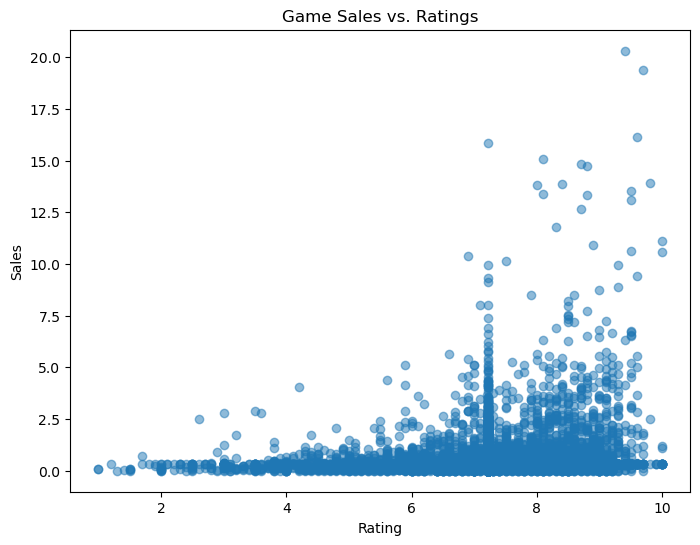

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['rating'], df['sales'], alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Sales')
_ = plt.title('Game Sales vs. Ratings')

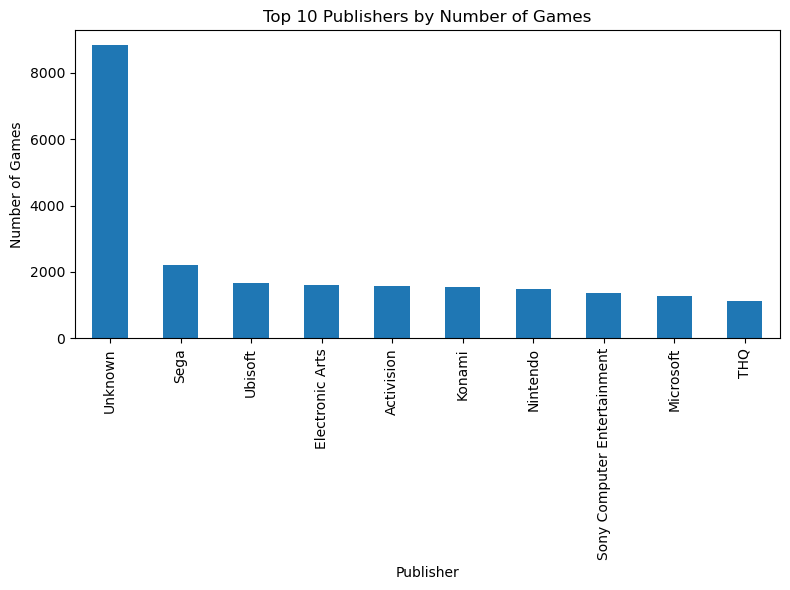

In [16]:
publisher_counts = df['publisher'].value_counts()

# Select the top n publishers (adjust n as needed)
top_n = 10
top_publishers = publisher_counts.head(top_n)

# Create a bar chart
plt.figure(figsize=(8, 6))
top_publishers.plot(kind='bar')
plt.title(f'Top {top_n} Publishers by Number of Games')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


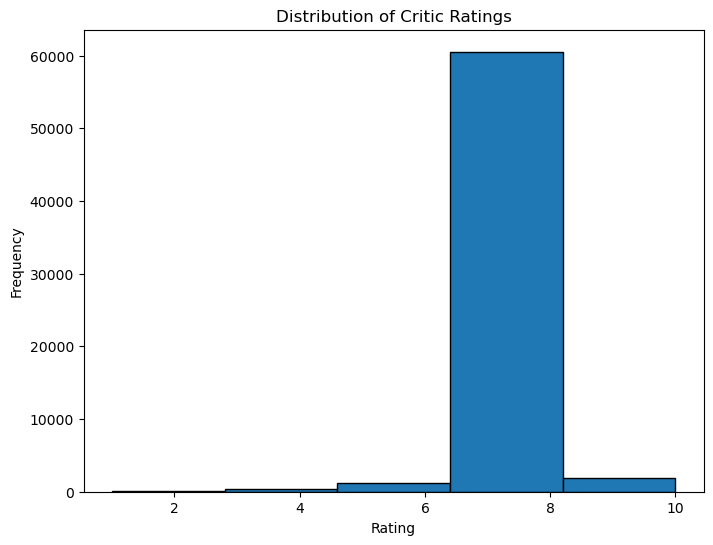

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(df['rating'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Critic Ratings')
plt.show()

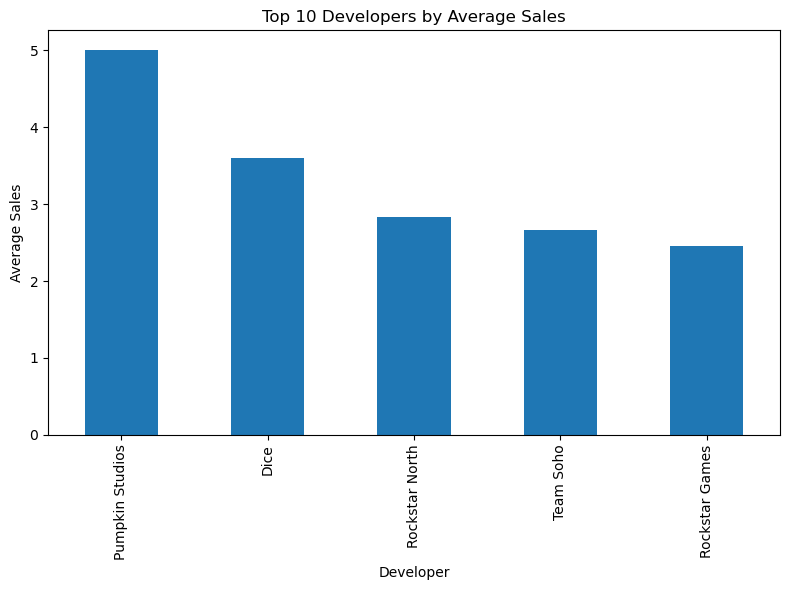

In [18]:
top_developers_by_sales = df.groupby('developer')['sales'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 6))
top_developers_by_sales.plot(kind='bar')
plt.title('Top 10 Developers by Average Sales')
plt.xlabel('Developer')
plt.ylabel('Average Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

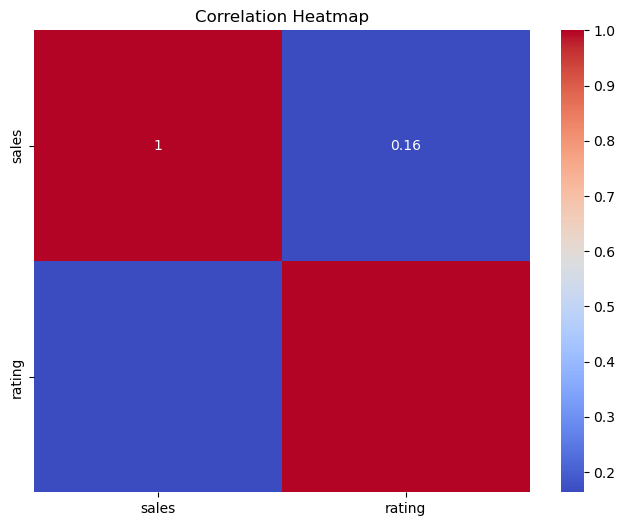

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['sales', 'rating']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
pip install wordCloud
from wordcloud import WordCloud, STOPWORDS

# Join all game titles into a single string
text = ' '.join(df['title'].astype(str))

# Customize stopwords as needed
stopwords = set(STOPWORDS)
stopwords.update(["said"])  # Add more words to exclude if necessary

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the generated image
plt.figure(figsize=(8, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


SyntaxError: invalid syntax (3785399235.py, line 1)

In [25]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ------------ --------------------------- 92.2/300.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
